## Q1

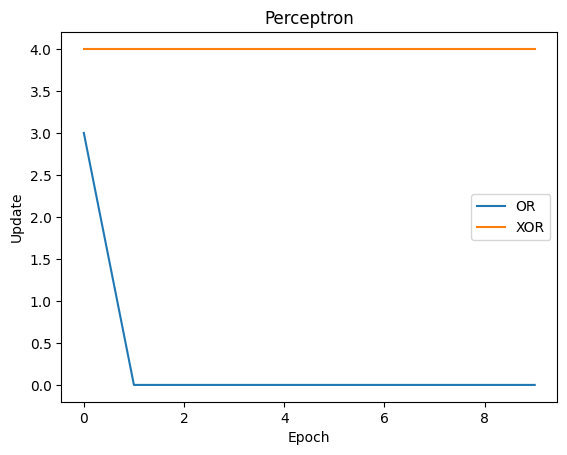

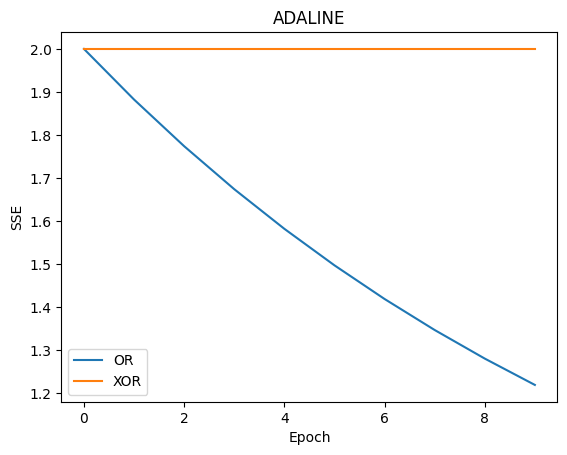

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Bipolar activation function
def bipolar_activation(x):
    return np.where(x >= 0, 1, -1)

# Perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.errors = []  # Record the number of misclassifications

        for epoch in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                error += int(update != 0.0)
            self.errors.append(error)  # Store the number of updates for each epoch

    def predict(self, X):
        net_input = np.dot(X, self.weights) + self.bias
        return bipolar_activation(net_input)  # Apply bipolar activation function

# ADALINE model
class Adaline:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.cost = []  # Record the cost

        for epoch in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.weights += self.learning_rate * X.T.dot(errors)
            self.bias += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost.append(cost)  # Store the cost for each epoch

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# OR data
X_or = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_or = np.array([-1, 1, 1, 1])

# XOR data
X_xor = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_xor = np.array([-1, 1, 1, -1])

# Training Perceptron
perceptron_or = Perceptron(learning_rate=0.1, epochs=10)
perceptron_or.fit(X_or, y_or)

perceptron_xor = Perceptron(learning_rate=0.1, epochs=10)
perceptron_xor.fit(X_xor, y_xor)

# Training ADALINE
adaline_or = Adaline(learning_rate=0.01, epochs=10)
adaline_or.fit(X_or, y_or)

adaline_xor = Adaline(learning_rate=0.01, epochs=10)
adaline_xor.fit(X_xor, y_xor)

plt.plot(perceptron_or.errors, label='OR')
plt.plot(perceptron_xor.errors, label='XOR')
plt.xlabel('Epoch')
plt.ylabel('Update')
plt.title('Perceptron')
plt.legend()
plt.show()


plt.plot(adaline_or.cost, label='OR')
plt.plot(adaline_xor.cost, label='XOR')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.title('ADALINE')
plt.legend()
plt.show()


## Q2

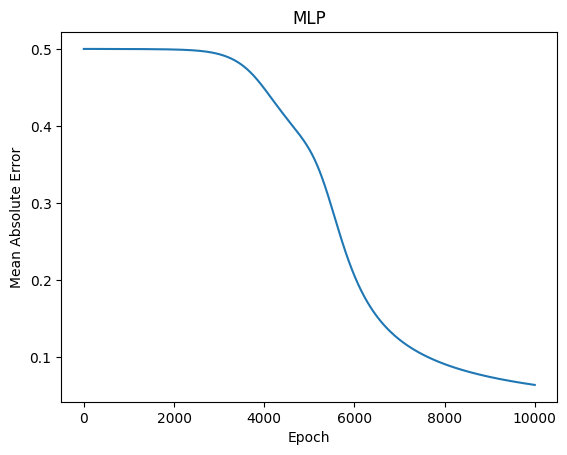

MLP output values for XOR data:
 [[0.06623764]
 [0.93823582]
 [0.93837482]
 [0.06702195]]


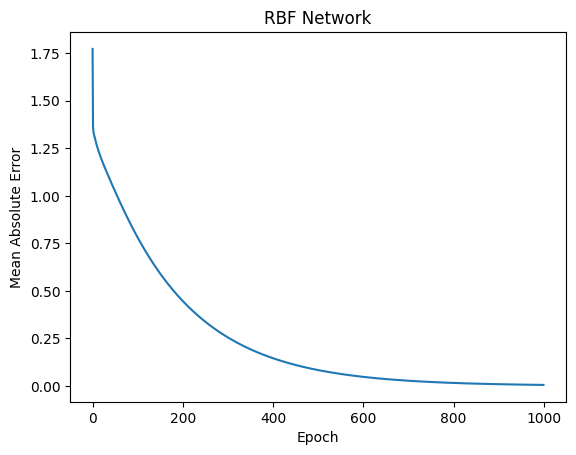

RBF Network output values for XOR data:
 [[0.03583733]
 [0.97439724]
 [0.96505996]
 [0.02508116]]


In [11]:
# Unipolar sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Gaussian activation function
def gaussian(x, mu, sigma):
    return np.exp(-np.linalg.norm(x - mu)**2 / (2 * sigma**2))

# MLP class
class MLP:
    def __init__(self, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        np.random.seed(1)
        self.weights_input_hidden = np.random.rand(X.shape[1], 2)
        self.weights_hidden_output = np.random.rand(2, 1)
        self.bias_hidden = np.zeros((1, 2))
        self.bias_output = np.zeros((1, 1))
        self.errors = []

        for epoch in range(self.epochs):
            # Forward propagation
            hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_output = sigmoid(hidden_input)
            final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
            final_output = sigmoid(final_input)

            # Compute error
            error = y - final_output
            self.errors.append(np.mean(np.abs(error)))

            # Backward propagation
            d_output = error * sigmoid_derivative(final_output)
            error_hidden = d_output.dot(self.weights_hidden_output.T)
            d_hidden = error_hidden * sigmoid_derivative(hidden_output)

            # Update weights and biases
            self.weights_hidden_output += hidden_output.T.dot(d_output) * self.learning_rate
            self.weights_input_hidden += X.T.dot(d_hidden) * self.learning_rate
            self.bias_output += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate
            self.bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate

    def predict(self, X):
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = sigmoid(final_input)
        return final_output

# RBF network class
class RBFNetwork:
    def __init__(self, num_centers, sigma):
        self.num_centers = num_centers
        self.sigma = sigma

    def fit(self, X, y):
        self.centers = X
        self.weights = np.random.rand(self.num_centers)
        self.bias = 0
        self.errors = []

        for epoch in range(1000):
            error = 0
            for xi, target in zip(X, y):
                phi = np.array([gaussian(xi, c, self.sigma) for c in self.centers])
                output = phi.dot(self.weights) + self.bias
                error += (target - output)**2
                self.weights += 0.1 * phi * (target - output)
                self.bias += 0.1 * (target - output)
            self.errors.append(np.mean(np.abs(error)))

    def predict(self, X):
        outputs = []
        for xi in X:
            phi = np.array([gaussian(xi, c, self.sigma) for c in self.centers])
            output = phi.dot(self.weights) + self.bias
            outputs.append(output)
        return np.array(outputs)

# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Training
mlp = MLP(learning_rate=0.1, epochs=10000)
mlp.fit(X, y)

# Predicting
mlp_output = mlp.predict(X)

rbf = RBFNetwork(num_centers=4, sigma=1.0)
rbf.fit(X, y)

rbf_output = rbf.predict(X)

# Plotting MLP behavior
plt.plot(mlp.errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('MLP')
plt.show()

print("MLP output values for XOR data:\n", mlp_output)

# Plotting RBF Network behavior
plt.plot(rbf.errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('RBF Network')
plt.show()

print("RBF Network output values for XOR data:\n", rbf_output)
